In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
! kaggle datasets download -d kratosishere/recog2

 99% 737M/748M [00:05<00:00, 164MB/s]
100% 748M/748M [00:05<00:00, 131MB/s]


In [2]:
!unzip "/content/recog2.zip"

Archive:  /content/recog2.zip
  inflating: Train_Cells_masks/train (1).jpg  
  inflating: Train_Cells_masks/train (10).jpg  
  inflating: Train_Cells_masks/train (100).jpg  
  inflating: Train_Cells_masks/train (1000).jpg  
  inflating: Train_Cells_masks/train (101).jpg  
  inflating: Train_Cells_masks/train (102).jpg  
  inflating: Train_Cells_masks/train (103).jpg  
  inflating: Train_Cells_masks/train (104).jpg  
  inflating: Train_Cells_masks/train (105).jpg  
  inflating: Train_Cells_masks/train (106).jpg  
  inflating: Train_Cells_masks/train (107).jpg  
  inflating: Train_Cells_masks/train (108).jpg  
  inflating: Train_Cells_masks/train (109).jpg  
  inflating: Train_Cells_masks/train (11).jpg  
  inflating: Train_Cells_masks/train (110).jpg  
  inflating: Train_Cells_masks/train (111).jpg  
  inflating: Train_Cells_masks/train (112).jpg  
  inflating: Train_Cells_masks/train (113).jpg  
  inflating: Train_Cells_masks/train (114).jpg  
  inflating: Train_Cells_masks/train (115)

In [3]:
!nvidia-smi

Fri Apr 22 19:16:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

In [5]:
from simple_unet_model import simple_unet_model   
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [6]:
image_directory = '/content/train'
mask_directory = '/content/Train_Cells_masks'

In [7]:
SIZE = 128
image_dataset = []  
mask_dataset = [] 

In [8]:
# import pandas as pd
# df = pd.read_csv('sample_submission_.csv')

In [9]:
# df.shape

In [10]:
# images = os.listdir(image_directory)
# for i, image_name in enumerate(images):   
#     if (image_name.split('.')[1] == 'jpg'):
#         image = cv2.imread(image_directory+image_name, 0)
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         image_dataset.append(np.array(image))

In [11]:
img_d_l = []
for itr in os.listdir(image_directory):
    img_d_l.append(itr)
    img = (cv2.imread(os.path.join(image_directory , itr) , cv2.IMREAD_GRAYSCALE))
    img_pil = Image.fromarray(img)
    img = np.array(img_pil.resize((SIZE, SIZE), Image.ANTIALIAS))
    image_dataset.append(img)

In [12]:
image_dataset[0].shape

(128, 128)

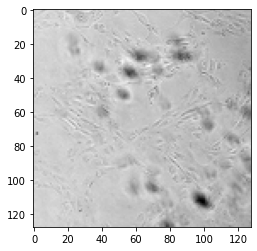

In [13]:
img = image_dataset[150]
plt.imshow(img , cmap = 'gray')

In [14]:
img_d_l[150]

'train (27).jpg'

In [15]:
mask_d_l=[]

In [16]:
for itr in os.listdir(mask_directory):
    mask_d_l.append(itr)
    img = (cv2.imread(os.path.join(mask_directory , itr) , cv2.IMREAD_GRAYSCALE))
    img_pil = Image.fromarray(img)
    img = np.array(img_pil.resize((SIZE, SIZE), Image.ANTIALIAS))
    mask_dataset.append(img)

In [17]:
mask_dataset[0].shape

(128, 128)

In [18]:
mask_d_l[150]

'train (27).jpg'

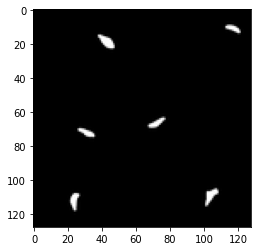

In [19]:
img = mask_dataset[150]
plt.imshow(img , cmap = 'gray')

In [20]:
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

In [21]:
mask_dataset.shape

(1000, 128, 128, 1)

In [22]:
image_dataset.shape

(1000, 128, 128, 1)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

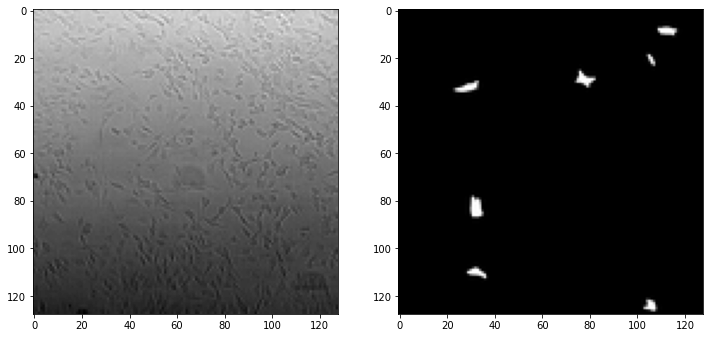

In [24]:
import random
import numpy as np
image_number = random.randint(0, len(x_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(x_train[image_number], (128, 128)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (128, 128)), cmap='gray')
plt.show()

In [25]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [42]:
model = get_model()



history = model.fit(x_train, y_train, 
                    batch_size = 4, 
                    verbose=1, 
                    epochs=1000, 
                    validation_data=(x_test, y_test), 
                    shuffle=False)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 128, 128, 16  0           ['conv2d_38[0][0]']              
                                )                                                           

In [43]:
history

In [44]:
model.save('wts.hdf5')

In [45]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

4/4 [==============================] - 0s 18ms/step - loss: 0.1015 - accuracy: 0.9573
Accuracy =  95.73339819908142 %


In [59]:
y_pred=model.predict(x_test)
y_pred_thresholded = y_pred > 0.2

In [60]:
np.max(y_pred[2])

0.46294102

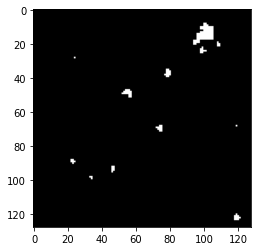

In [61]:
plt.imshow(y_pred_thresholded[31][: , : , 0] , cmap = 'gray')

In [74]:
test_img_number = random.randint(0, len(x_test))
test_img = x_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

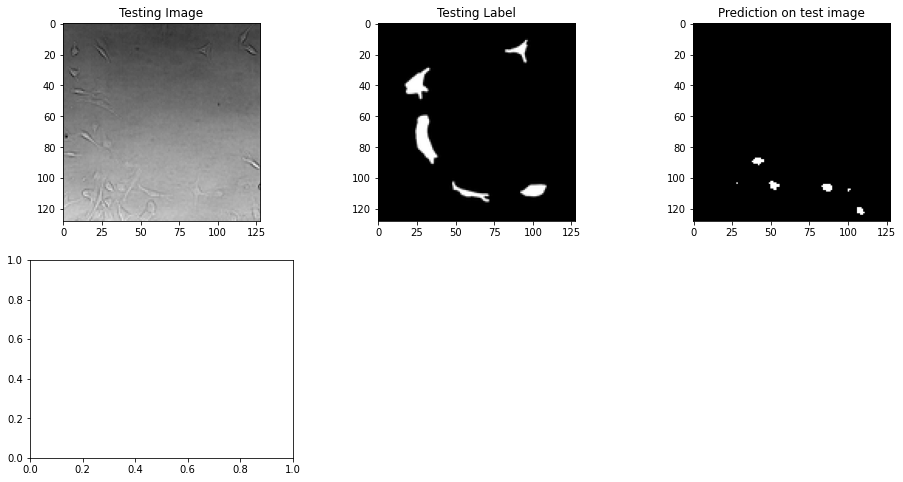

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)